In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle, save_pickle
from scipy.stats import sem

from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
    TWO_COL_WIDTH_INCH,
)

In [16]:
all_res = glob("out/*/*.pkl")

In [17]:
all_compiled_res = []

for res in all_res:
    res = load_pickle(res)
    compiled = {
        "train_size": res["train_size"],
        "num_classes": res["num_classes"],
        "representation": res["representation"],
        "model": res["model"],
        **res["metrics"],
    }
    all_compiled_res.append(compiled)

In [18]:
df = pd.DataFrame(all_compiled_res)

In [19]:
grouped_df = df.groupby(["train_size", "num_classes", "representation", "model"]).agg(
    ["mean", "std", sem]
)

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_68505/4076749725.py:1: FutureWarning: ['confusion_matrix', 'all_y_true', 'all_y_pred', 'valid_indices'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = df.groupby(['train_size', 'num_classes', 'representation', 'model']).agg(['mean', 'std', sem])


In [20]:
grouped_df

accuracy            \
                                                            mean       std   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.635000  0.030166   
                                      text-ada-001      0.305974  0.034963   
                                      text-babbage-001  0.461328  0.041337   
                                      text-curie-001    0.430014  0.062467   
                                      text-davinci-003  0.553333  0.030111   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.305000  0.051962   
                                      text-ada-001      0.222500  0.033040   
                                      text-babbage-001  0.235000  0.012910   
                                      text-curie-001    0.237500  0.050580   
                                      text-davinci-003  0.257500  0.025000   

                                                                 acc_macro  \
                                                             sem      mean   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.012315  0.752444   
                                      text-ada-001      0.014274  0.851472   
                                      text-babbage-001  0.016876  0.781905   
                                      text-curie-001    0.025502  0.766554   
                                      text-davinci-003  0.012293  0.751111   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.025981  0.722000   
                                      text-ada-001      0.016520  0.702000   
                                      text-babbage-001  0.006455  0.694000   
                                      text-curie-001    0.025290  0.695000   
                                      text-davinci-003  0.012500  0.703000   

                                                                            \
                                                             std       sem   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.075809  0.030949   
                                      text-ada-001      0.029182  0.011914   
                                      text-babbage-001  0.075814  0.030951   
                                      text-curie-001    0.062107  0.025355   
                                      text-davinci-003  0.047019  0.019195   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.020785  0.010392   
                                      text-ada-001      0.028566  0.014283   
                                      text-babbage-001  0.005164  0.002582   
                                      text-curie-001    0.020232  0.010116   
                                      text-davinci-003  0.010000  0.005000   

                                                            racc            \
                                                            mean       std   
train_size num_classes representation model                                  
5          2           SMILES         code-davinci-002  0.493433  0.012848   
                                      text-ada-001      0.321192  0.025138   
                                      text-babbage-001  0.472319  0.041844   
                                      text-curie-001    0.462498  0.043035   
                                      text-davinci-003  0.490467  0.019580   
...                                                          ...       ...   
100        5           name           code-davinci-002  0.205175  0.022373 

In [21]:
gpr_results = pd.read_pickle(
    "/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/xgboost_results.pkl"
)
tabpfn_results = pd.read_pickle(
    "/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/tabpfn_results.pkl"
)

In [22]:
gpr_results

accuracy                      f1_macro            \
                            mean       std       sem      mean       std   
num_classes train_size                                                     
2           10          0.648376  0.141693  0.016699  0.574723  0.215287   
            20          0.758118  0.117627  0.017535  0.733342  0.162960   
            50          0.824787  0.058971  0.008178  0.821165  0.065290   
            100         0.898182  0.026629  0.004635  0.897974  0.026808   
            200         0.891818  0.025181  0.004383  0.891751  0.025177   
5           10          0.322376  0.098830  0.012759  0.272508  0.136845   
            20          0.364498  0.086993  0.014919  0.340586  0.113124   
            50          0.445150  0.085855  0.013248  0.433477  0.089667   
            100         0.555000  0.036116  0.007372  0.553357  0.037676   
            200         0.644444  0.028465  0.005478  0.639732  0.030063   

                                  f1_micro                         kappa  \
                             sem      mean       std       sem      mean   
num_classes train_size                                                     
2           10          0.025372  0.648376  0.141693  0.016699  0.296752   
            20          0.024293  0.758118  0.117627  0.017535  0.516235   
            50          0.009054  0.824787  0.058971  0.008178  0.649575   
            100         0.004667  0.898182  0.026629  0.004635  0.796364   
            200         0.004383  0.891818  0.025181  0.004383  0.783636   
5           10          0.017667  0.322376  0.098830  0.012759  0.160608   
            20          0.019401  0.364498  0.086993  0.014919  0.209653   
            50          0.013836  0.445150  0.085855  0.013248  0.309065   
            100         0.007691  0.555000  0.036116  0.007372  0.443977   
            200         0.005786  0.644444  0.028465  0.005478  0.555219   

                                            
                             std       sem  
num_classes train_size                      
2           10          0.283386  0.033397  
            20          0.235254  0.035070  
            50          0.117942  0.016356  
            100         0.053258  0.009271  
            200         0.050362  0.008767  
5           10          0.118845  0.015343  
            20          0.107439  0.018426  
            50          0.105999  0.016356  
            100         0.045467  0.009281  
            200         0.035870  0.006903

In [27]:
models = [
    "text-davinci-003",
    "text-ada-001",
    "text-babbage-001",
    "text-curie-001",
    "code-davinci-002",
]

representations = ["name", "SMILES", "inchi", "selfies"]

In [28]:
max_x = 100

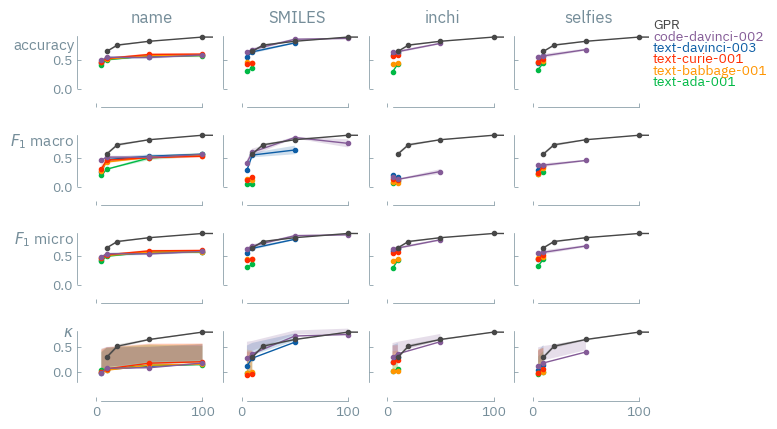

In [31]:
ig, ax = plt.subplots(
    4, 4, sharex="all", sharey="row", figsize=(TWO_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH)
)


# plot accuracy for 2 class as a function of the training size
for i, rpr in enumerate(representations):
    for model in models:
        ax[0][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values,
            label=f"{model}",
            marker="o",
        )
        ax[0][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["sem"].values,
            alpha=0.2,
        )

    ax[0][i].set_title(f"{rpr}")

    ax[0][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["accuracy"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[0][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["accuracy"]["mean"].values
        - gpr_results.loc[2, :]["accuracy"]["sem"].values,
        gpr_results.loc[2, :]["accuracy"]["mean"].values
        + gpr_results.loc[2, :]["accuracy"]["sem"].values,
        alpha=0.2,
    )

    range_frame(
        ax[0][i],
        np.array([5, max_x]),
        np.array([df["accuracy"].min(), df["accuracy"].max()]),
    )

ylabel_top("accuracy", ax[0][0], x_pad=0.1)
# range_frame(ax[0][i], grouped_df.loc[:, 2, rpr, model].index.values, np.array([0, 1]))

for i, rpr in enumerate(representations):
    for model in models:
        ax[1][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[1][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["sem"].values,
            alpha=0.2,
        )

        range_frame(
            ax[1][i],
            np.array([5, max_x]),
            np.array([df["f1_macro"].min(), df["f1_macro"].max()]),
        )

    ax[1][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_macro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[1][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_macro"]["mean"].values
        - gpr_results.loc[2, :]["f1_macro"]["sem"].values,
        gpr_results.loc[2, :]["f1_macro"]["mean"].values
        + gpr_results.loc[2, :]["f1_macro"]["sem"].values,
        alpha=0.2,
    )

ylabel_top(r"$F_1$ macro", ax[1][0], x_pad=0.1)


for i, rpr in enumerate(representations):
    for model in models:
        ax[2][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[2][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["sem"].values,
            alpha=0.2,
        )

        range_frame(
            ax[2][i],
            np.array([5, max_x]),
            np.array([df["f1_micro"].min(), df["f1_micro"].max()]),
        )

    ax[2][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_micro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[2][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["f1_micro"]["mean"].values
        - gpr_results.loc[2, :]["f1_micro"]["sem"].values,
        gpr_results.loc[2, :]["f1_micro"]["mean"].values
        + gpr_results.loc[2, :]["f1_micro"]["sem"].values,
        alpha=0.2,
    )

ylabel_top(r"$F_1$ micro", ax[2][0], x_pad=0.1)


for i, rpr in enumerate(representations):
    for model in models:
        ax[3][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[3][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["sem"].values,
            alpha=0.2,
        )

        range_frame(
            ax[3][i],
            np.array([5, max_x]),
            np.array([df["kappa"].min(), df["kappa"].max()]),
        )

    ax[3][i].plot(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["kappa"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[3][i].fill_between(
        gpr_results.loc[2, :].index.values,
        gpr_results.loc[2, :]["kappa"]["mean"].values
        - gpr_results.loc[2, :]["kappa"]["sem"].values,
        gpr_results.loc[2, :]["kappa"]["mean"].values
        + gpr_results.loc[2, :]["kappa"]["sem"].values,
        alpha=0.2,
    )

ylabel_top(r"$\kappa$", ax[3][0], x_pad=0.1)

matplotx.line_labels(ax[0][3])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)


fig.text(0.4, 0.1, "number training points", fontdict={"size": 11})

fig.savefig("few_shot_learning.pdf", bbox_inches="tight")

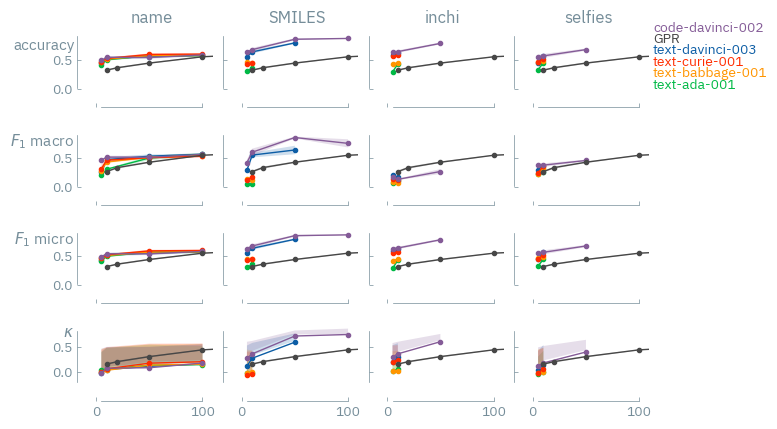

In [32]:
ig, ax = plt.subplots(
    4, 4, sharex="all", sharey="row", figsize=(TWO_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH)
)


# plot accuracy for 2 class as a function of the training size
for i, rpr in enumerate(representations):
    for model in models:
        ax[0][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values,
            label=f"{model}",
            marker="o",
        )
        ax[0][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "accuracy"]["sem"].values,
            alpha=0.2,
        )

    ax[0][i].set_title(f"{rpr}")

    ax[0][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["accuracy"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[0][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["accuracy"]["mean"].values
        - gpr_results.loc[5, :]["accuracy"]["sem"].values,
        gpr_results.loc[5, :]["accuracy"]["mean"].values
        + gpr_results.loc[5, :]["accuracy"]["sem"].values,
        alpha=0.2,
    )

    range_frame(
        ax[0][i],
        np.array([5, max_x]),
        np.array([df["accuracy"].min(), df["accuracy"].max()]),
    )

ylabel_top("accuracy", ax[0][0], x_pad=0.1)
# range_frame(ax[0][i], grouped_df.loc[:, 2, rpr, model].index.values, np.array([0, 1]))

for i, rpr in enumerate(representations):
    for model in models:
        ax[1][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[1][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "f1_macro"]["sem"].values,
            alpha=0.2,
        )

        range_frame(
            ax[1][i],
            np.array([5, max_x]),
            np.array([df["f1_macro"].min(), df["f1_macro"].max()]),
        )

    ax[1][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_macro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[1][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_macro"]["mean"].values
        - gpr_results.loc[5, :]["f1_macro"]["sem"].values,
        gpr_results.loc[5, :]["f1_macro"]["mean"].values
        + gpr_results.loc[5, :]["f1_macro"]["sem"].values,
        alpha=0.2,
    )

ylabel_top(r"$F_1$ macro", ax[1][0], x_pad=0.1)


for i, rpr in enumerate(representations):
    for model in models:
        ax[2][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[2][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["sem"].values,
            alpha=0.2,
        )

        range_frame(
            ax[2][i],
            np.array([5, max_x]),
            np.array([df["f1_micro"].min(), df["f1_micro"].max()]),
        )

    ax[2][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_micro"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[2][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["f1_micro"]["mean"].values
        - gpr_results.loc[5, :]["f1_micro"]["sem"].values,
        gpr_results.loc[5, :]["f1_micro"]["mean"].values
        + gpr_results.loc[5, :]["f1_micro"]["sem"].values,
        alpha=0.2,
    )

ylabel_top(r"$F_1$ micro", ax[2][0], x_pad=0.1)


for i, rpr in enumerate(representations):
    for model in models:
        ax[3][i].plot(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values,
            label=f"{model}",
            marker="o",
        )

        ax[3][i].fill_between(
            grouped_df.loc[:, 2, rpr, model].index.values,
            grouped_df.loc[(slice(None), 2, rpr, model), "f1_micro"]["mean"].values
            - grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["sem"].values,
            grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["mean"].values
            + grouped_df.loc[(slice(None), 2, rpr, model), "kappa"]["sem"].values,
            alpha=0.2,
        )

        range_frame(
            ax[3][i],
            np.array([5, max_x]),
            np.array([df["kappa"].min(), df["kappa"].max()]),
        )

    ax[3][i].plot(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["kappa"]["mean"].values,
        label=f"GPR",
        marker="o",
    )

    ax[3][i].fill_between(
        gpr_results.loc[5, :].index.values,
        gpr_results.loc[5, :]["kappa"]["mean"].values
        - gpr_results.loc[5, :]["kappa"]["sem"].values,
        gpr_results.loc[5, :]["kappa"]["mean"].values
        + gpr_results.loc[5, :]["kappa"]["sem"].values,
        alpha=0.2,
    )

ylabel_top(r"$\kappa$", ax[3][0], x_pad=0.1)

matplotx.line_labels(ax[0][3])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)


fig.text(0.4, 0.1, "number training points", fontdict={"size": 11})

fig.savefig("few_shot_learning_5.pdf", bbox_inches="tight")